In [ ]:
import numpy as np
import pandas as pd
import math as math
import matplotlib
import matplotlib.pyplot as plt
import json
import os
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import TimeSeriesSplit
from math import sqrt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error
import gurobipy as gb
from gurobipy import GRB
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
import csv

# Data

### Whole dataset

In [ ]:

# Loading the feature selected from the climate data for years 2021-2022
DataX = pd.read_csv("Feature_selected.csv",index_col=0)
# Loading the actual wind power production for years 2021-2022
DataY = pd.read_csv("Processed_data.csv")['Actual']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(DataX, DataY, test_size=0.25, shuffle = False)

# Loading the prices (Day ahead price, up regulation price, down regulation price) for the revenue calculations done in the end
prices_df = pd.read_csv("Prices_processed.csv",index_col =0).round(2)
# Spliting the prices into training and testing sets to use the test prices set in the revenue calculation model, 
# since they will correspond to the predictions made using the regression model
prices_train, prices_test = train_test_split(prices_df, test_size=0.25, shuffle = False)

### 300 First Data points and 7 features

In [ ]:
# We create a seperate data set of only 300 data points 
DataX300 = pd.read_csv("Feature_selected_lesssamples.csv",index_col=0).head(300)
DataY300 = pd.read_csv("Processed_data.csv")['Actual'].head(300)
X300_train, X300_test, y300_train, y300_test = train_test_split(DataX300, DataY300, test_size=0.25, shuffle = False)

# Gradient descent algorithm

### Whole dataset

In [ ]:
# Method 1: The gradient descent algorithm SkLearn

# Training and fitting a linear regression model using sklearn
reg = LinearRegression().fit(X_train, y_train)
# Predictiong of Y test set using the X testing set in the linear that we make
y_pred = reg.predict(X_test)

#check error 
# Mean square error
print('MSE:',np.round(mean_squared_error(y_test,y_pred), decimals=4))
# Root mean squared erro
print('RMSE',np.round(math.sqrt(mean_squared_error(y_test,y_pred)), decimals=4))
# R^2
print('R^2:',np.round(r2_score(y_test, y_pred, force_finite=False), decimals=4))
# Mean absolute error
print('MAE:',np.round(mean_absolute_error(y_test, y_pred), decimals=4))
#print('Score:',reg.score(X_train, y_train))

MSE: 0.0071
RMSE 0.0845
R^2: 0.7619
MAE: 0.0661


### 300 First Data points and 7 features

In [ ]:
# STEP 3: Method 1 The gradient descent algorithm SkLearn

# Repeation of the steps done previously with a smaller data-set 
# (300 data-points instead of 17520 and 7 features instead of 10)

reg = LinearRegression().fit(X300_train, y300_train)
y300_pred = reg.predict(X300_test)

#check error 
print('MSE:',np.round(mean_squared_error(y300_test,y300_pred), decimals=4))
print('RMSE',np.round(math.sqrt(mean_squared_error(y300_test,y300_pred)), decimals=4))
print('R^2:',np.round(r2_score(y300_test, y300_pred, force_finite=False), decimals=4))
print('MAE:',np.round(mean_absolute_error(y300_test,y300_pred), decimals=4))
#print('Score:',reg.score(X300_train, y300_train))

MSE: 0.0258
RMSE 0.1606
R^2: 0.6083
MAE: 0.1302


# Closed form solution

### Whole dataset

In [ ]:
# STEP 3: Method 2 Closed form solution

# Normalization the Y data set since unlike for gradient descent, the Y data set also needs to be normalized
y_train_norm = (y_train - y_train.min(axis=0)) / (y_train.max(axis=0) - y_train.min(axis=0))
y_test_norm = (y_test - y_test.min(axis=0)) / (y_test.max(axis=0) - y_test.min(axis=0))

# Calculating the regression parameter
custom_theta = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train_norm)
# Calculating the predictions of the Y test set 
custom_preds = X_test.dot(custom_theta)

#check error 
print('MSE:',np.round(mean_squared_error(y_test_norm, custom_preds), decimals=4))
print('RMSE',np.round(math.sqrt(mean_squared_error(y_test_norm, custom_preds)), decimals=4))
print('R^2:',np.round(r2_score(y_test_norm, custom_preds, force_finite=False), decimals=4))
print('MAE:',np.round(mean_absolute_error(y_test_norm, custom_preds), decimals=4))
#print('Score:',reg.score(X_train, y_train))

MSE: 0.0103
RMSE 0.1014
R^2: 0.7625
MAE: 0.0771


### 300 First Data points and 7 features

In [ ]:
# STEP 3: Method 2 Closed form solution
y300_train_norm = (y300_train - y300_train.min(axis=0)) / (y300_train.max(axis=0) - y300_train.min(axis=0))
y300_test_norm = (y300_test - y300_test.min(axis=0)) / (y300_test.max(axis=0) - y300_test.min(axis=0))

custom300_theta = np.linalg.inv(X300_train.T.dot(X300_train)).dot(X300_train.T).dot(y300_train_norm)
custom300_preds = X300_test.dot(custom300_theta)

#check error 
print('MSE:',np.round(mean_squared_error(y300_test_norm, custom300_preds), decimals=4))
print('RMSE',np.round(math.sqrt(mean_squared_error(y300_test_norm, custom300_preds)), decimals=4))
print('R^2:',np.round(r2_score(y300_test_norm, custom300_preds, force_finite=False), decimals=4))
print('MAE:',np.round(mean_absolute_error(y300_test_norm, custom300_preds), decimals=4))
#print('Score:',reg.score(X_train, y_train))

MSE: 0.0287
RMSE 0.1693
R^2: 0.6732
MAE: 0.1338


# Plots

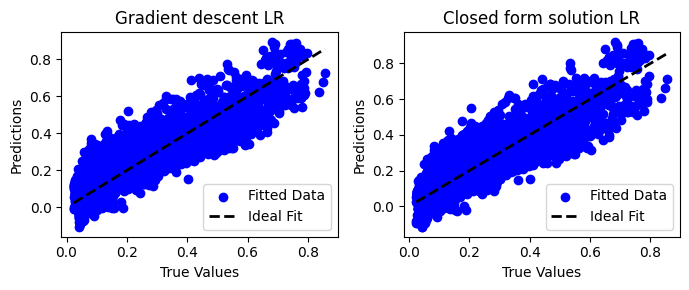

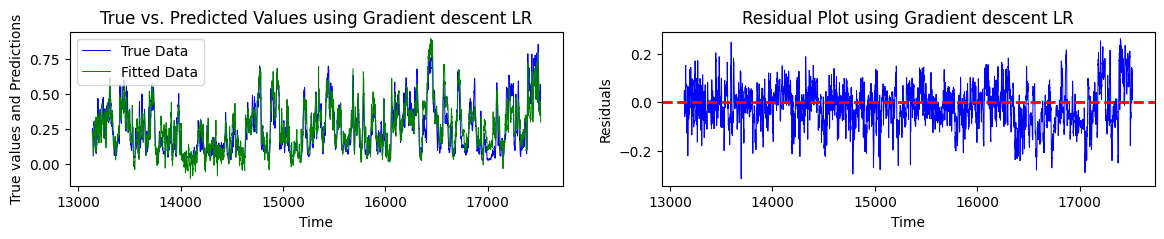

Under predicting: -179.7061665650839
Over predicting: 109.90164304538942


In [ ]:
plt.figure(figsize=(7, 3))

# Subplot 1
# Plotting the true values vs the fitted values for the gradient dscent algorithm with the whole data
plt.subplot(121)
plt.scatter(y_test, y_pred , c='b', label='Fitted Data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, label='Ideal Fit')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Gradient descent LR')
plt.legend()

# Subplot 2
# Plotting the true values vs the fitted values for the closed form solution with the whole data
plt.subplot(122)
plt.scatter(y_test, custom_preds, c='b', label='Fitted Data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, label='Ideal Fit')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Closed form solution LR')
plt.legend()

plt.tight_layout()
plt.show()

# Plotting the true values and fitted values on the time series axis for the the gradient dscent algorithm
plt.figure(figsize=(14, 2)) 
plt.subplot(121)
plt.plot(y_test.index, y_test, alpha = 1,lw=0.7, c='b', label='True Data')
plt.plot(y_test.index, y_pred , alpha = 1,lw=0.7, c='g', label='Fitted Data')
plt.xlabel('Time')
plt.ylabel('True values and Predictions')
plt.title('True vs. Predicted Values using Gradient descent LR')
plt.legend()

residuals = y_test - y_pred
# Plotting the residual values on the time series axis for the the gradient dscent algorithm
plt.subplot(122)
plt.plot(y_test.index , residuals,lw=0.7, c='b')
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.title('Residual Plot using Gradient descent LR')
plt.show()


print('Under predicting:',sum(residuals[residuals<0]))
print('Over predicting:',sum(residuals[residuals>0]))

# Revenue Calculations

In [ ]:
def Optimization_wind(Windspeed,prices):
    #Windspeed = Windspeed.to_numpy()
    Time = len(Windspeed)
    T = range(Time)

    DA_prices = prices["SpotPriceEUR"].to_numpy()
    Up_prices = prices["Up-regulating_price"].to_numpy()
    Down_prices = prices["Down-regulating_price"].to_numpy()
    Capacity = 1 

    psi_up= Up_prices -DA_prices
    psi_down = DA_prices- Down_prices

    model_opt = gb.Model("Step1_A")
    p_DA_A = model_opt.addVars(Time,lb=0)
    p_delt = model_opt.addVars(Time,lb=-gb.GRB.INFINITY,ub=gb.GRB.INFINITY)

    p_E_up = model_opt.addVars(Time,lb =-1,ub=0)
    p_E_down = model_opt.addVars(Time,lb =0,ub=1)

    model_opt.setObjective(
    gb.quicksum(p_DA_A[t]*DA_prices[t] 
            + (Up_prices[t] *  p_E_up[t] + Down_prices[t] *  p_E_down[t]) for t in T )
            ,gb.GRB.MAXIMIZE)

    
    model_opt.addConstrs(
    (p_DA_A[t] <= Capacity
    for t in T
    )
    )

    model_opt.addConstrs(
    (
    p_delt[t] == Windspeed[t]-p_DA_A[t]
    for t in T
    )
    )

    model_opt.addConstrs(
    (
    p_delt[t] == p_E_up[t] + p_E_down[t]
    for t in T
    )
    )

    model_opt.setParam('OutputFlag', False )
    model_opt.optimize()
    if model_opt.status == GRB.OPTIMAL:
        obj_val =  model_opt.objVal 
        print("Revenue =", "{:.2f}".format(model_opt.objVal))
        print("Offering Strategy =", ["{:.2f}".format(p_DA_A[t].x) for t in T])
        print("Imbalance Power =", ["{:.2f}".format(p_delt[t].x) for t in T])
        print("Real Power  =", ["{:.2f}".format(Windspeed[t]) for t in T])
        P_DA = [p_DA_A[t].x for t in T]
        obj_vals_hour ={t: p_DA_A[t].x*DA_prices[t] - (Up_prices[t] *  p_E_up[t].x + Down_prices[t] *  p_E_down[t].x) for t in T }

        p_E_up_list =[p_E_up[t].x for t in T]
        p_E_down_list = [p_E_down[t].x for t in T]


    else:
        print("Optimization was not successful")

    return P_DA,obj_val,obj_vals_hour,p_E_up_list,p_E_down_list

In [ ]:
def balancing_revenue(P_DA_bid, real_wind, prices):
    """
    Inputs: 
    P_DA_bid = The Day ahead bids that have been made by optimization program at time t 
    real_wind = The actual power produced by wind turbine at time t         
    prices = The prices time 


    Calculates the result of our day ahead bids based on our wind forecast 

    Outputs: 
    Revenue: The actual revenue by our prediction of day ahead bids
    p_up: The upregulation power needed to be provided
    p_down: The downregulation power able to provided 

    """
    Time = len(P_DA_bid)
    T = range(Time)
    real_wind = real_wind.values
    DA_prices = prices["SpotPriceEUR"].to_numpy()
    Up_prices = prices["Up-regulating_price"].to_numpy()
    Down_prices = prices["Down-regulating_price"].to_numpy()
    p_up = np.empty(Time)
    p_down = np.empty(Time)
 
    for t in T:
        
        
        if real_wind[t] <= P_DA_bid[t] :
            p_up[t] = real_wind[t] -P_DA_bid[t]
        else:
            p_up[t] = 0
        if real_wind[t] >= P_DA_bid[t] :
            p_down[t] = real_wind[t] - P_DA_bid[t]
        else:
            p_down[t] = 0
    
    Revenue = np.dot(P_DA_bid,DA_prices) + np.dot(p_up,Up_prices) + np.dot(p_down,Down_prices)   
    
    return Revenue, p_up,p_down

In [ ]:
DataY_vals = y_test.values.flatten()
M0_P_DA_vals,M0_obj_val, M0_obj_vals_hour,M0_p_E_up_list,M0_p_E_down_list = Optimization_wind(DataY_vals,prices_test)

Set parameter Username
Academic license - for non-commercial use only - expires 2024-10-07
Revenue = 504161.39
Offering Strategy = ['1.00', '0.25', '1.00', '0.24', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '0.26', '0.20', '0.18', '0.15', '0.13', '1.00', '0.00', '0.12', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '0.00', '1.00', '0.20', '0.00', '0.00', '0.25', '0.31', '0.00', '0.38', '0.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '0.39', '0.43', '0.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '0.00', '0.0

In [ ]:
DataY_vals = y_pred
# Change values to be between 0 and 1 at min and max
DataY_vals[DataY_vals<0] =0
DataY_vals[DataY_vals>1] =1
M1_P_DA_vals,M1_obj_val, M1_obj_vals_hour,M1_p_E_up_list,M1_p_E_down_list = Optimization_wind(DataY_vals,prices_test)
M1_Revenue, M1_p_up, M1_p_down = balancing_revenue(M1_P_DA_vals, y_test, prices_test)

Revenue = 528101.94
Offering Strategy = ['1.00', '0.21', '1.00', '0.22', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '0.30', '0.23', '0.22', '0.28', '0.19', '1.00', '0.00', '0.21', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '0.00', '1.00', '0.26', '0.00', '0.00', '0.26', '0.25', '0.00', '0.33', '0.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '0.41', '0.39', '0.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '0.00', '0.00', '0.27', '0.28', '0.24', '0.21', '0.19', '0.22', '1.00', '0.26', '0.28', '0.33', '0.27',

In [ ]:
M1_Revenue

500723.8244851344

In [ ]:
DataY_vals = custom_preds.values.flatten()
# Change values to be between 0 and 1 at min and max
DataY_vals[DataY_vals<0] =0
DataY_vals[DataY_vals>1] =1
M2_P_DA_vals,M2_obj_val, M2_obj_vals_hour,M2_p_E_up_list,M2_p_E_down_list = Optimization_wind(DataY_vals,prices_test)
M2_Revenue, M2_p_up, M2_p_down = balancing_revenue(M2_P_DA_vals, y_test, prices_test)

Revenue = 518143.09
Offering Strategy = ['1.00', '0.20', '1.00', '0.23', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '0.30', '0.22', '0.21', '0.28', '0.19', '1.00', '0.00', '0.21', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '0.00', '0.23', '0.26', '0.00', '0.00', '0.25', '0.24', '0.00', '0.34', '0.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '0.42', '0.40', '0.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '0.00', '0.00', '0.27', '0.28', '0.23', '0.20', '0.17', '0.21', '1.00', '0.25', '0.27', '0.32', '1.00',

In [ ]:
M2_Revenue

500825.15996109083

In [ ]:
# Storing in csv files to avoid having to rerun the code

# Opt_out = pd.DataFrame()

# Opt_out["M0_P_DA_vals"] = M0_P_DA_vals
# Opt_out["M0_obj_val"] = M0_P_DA_vals
# Opt_out["M0_obj_vals_hour"] = M0_obj_vals_hour
# Opt_out["M0_p_E_up_list"] = M0_p_E_up_list
# Opt_out["M0_p_E_down_list"] = M0_p_E_down_list

# Opt_out["M1_P_DA_vals"] = M1_P_DA_vals
# Opt_out["M1_obj_val"] = M1_P_DA_vals
# Opt_out["M1_obj_vals_hour"] = M1_obj_vals_hour
# Opt_out["M1_p_E_up_list"] = M1_p_E_up_list
# Opt_out["M1_p_E_down_list"] = M1_p_E_down_list

# Opt_out["M1_Revenue"] = M1_Revenue
# Opt_out["M1_p_up"] = M1_p_up
# Opt_out["M1_p_down"] = M1_p_down

# Opt_out["M2_P_DA_vals"] = M2_P_DA_vals
# Opt_out["M2_obj_val"] = M2_P_DA_vals
# Opt_out["M2_obj_vals_hour"] = M2_obj_vals_hour
# Opt_out["M2_p_E_up_list"] = M2_p_E_up_list
# Opt_out["M2_p_E_down_list"] = M2_p_E_down_list

# Opt_out["M2_Revenue"] = M2_Revenue
# Opt_out["M2_p_up"] = M2_p_up
# Opt_out["M2_p_down"] = M2_p_down

# Opt_out.to_csv('non-LR Opt Output.csv')

# preds_LR = pd.DataFrame()
# preds_LR['y_pred'] = y_pred
# preds_LR['custom_preds'] = custom_preds.values.flatten()
# preds_LR.to_csv('LR preds.csv')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=538942fa-4593-4d1a-b90d-2d23669fe78c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>